# Análisis Caida Libre de la Servilleta

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [65]:
Datos = pd.read_csv('caida_libre_1.cvs', sep = ';')
Datos['y_mts'] = Datos.y/100
Datos = Datos.drop(columns='y')
Datos

,t,y_mts
0,0.000000,0.000000
1,0.065900,0.003065
2,0.066000,0.017558
3,0.131900,0.039063
4,0.132000,0.077400
5,0.197933,0.115033
6,0.198033,0.166927
7,0.263956,0.230272
8,0.264056,0.294085
9,0.329900,0.375197


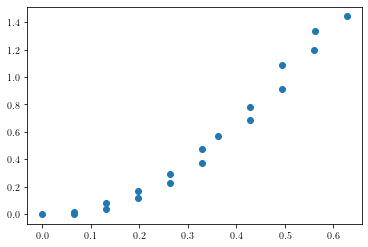

In [66]:
plt.scatter(Datos.t, Datos.y_mts, label = 'Datos Experimentales');


# Ajuste de Datos a modelo experimental

Suponemos que el objeto tiene un movimiento rectilineo uniformemente acelerado (caida libre), el cual está descrito por la ecuación cinemática 
\begin{equation}
y = \frac{1}{2}gt^2
\end{equation}
Noten que por la manera en que tomamos los ejes coordenados en tracker para hacer las mediciones, $y_0=0$m y $v_0=0$m/s. Este va a ser nuestro modelo basado en las leyes de la física.

In [67]:
def modelo(t,g): return 0.5*g*t**2
#Definir los valores para el modelo
t_data = Datos['t'].values
y_data = Datos['y_mts'].values

popt, _ = curve_fit(modelo, t_data, y_data) 
g = popt[0]

y_pred = modelo(t_data, g)
print('Gravedad =', g.round(3),'m/s2')

Gravedad = 7.874 m/s2


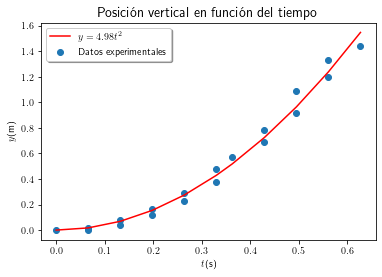

In [82]:
plt.rcParams['text.usetex'] = True
plt.scatter(t_data, y_data, label='Datos experimentales')
plt.plot(t_data, y_pred, color='red', label=r'$y=4.98t^{2}$')
plt.title('Posición vertical en función del tiempo',fontsize=14)
plt.ylabel(r'$y$(m)')
plt.xlabel(r'$t$(s)');
plt.legend(shadow=True)
plt.savefig('CaidaLibre_DatosAjuste.pdf')
plt.show()

In [83]:
error_grav = 100*np.abs(9.8 - g )/9.8
print('Error en la medida de la gravedad:',error_grav.round(3),'%')

Error en la medida de la gravedad: 19.652 %
